# Decision Tree Classification

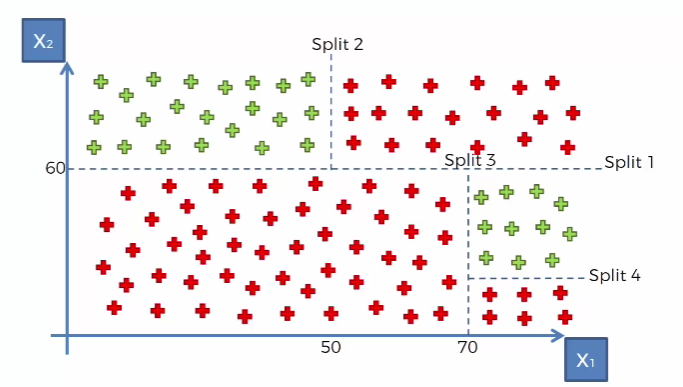

Key ideas behind decision tree classification: **information gain = 1 - Entropy** where entropy is defined as $Entropy = -\sum_{i=1}^{n}p_ilog_2p_i$ where $p_i$ is the **probability of getting category i among the entire samples in the node**. In detail, entropy is used for calculating **purity of a node** (**the lower the value of entropy, the higher purity of the node**); thus, the entropy of homogeneous node (where node with only one type of sample) is 0. In decision tree, we aims to achieve homoegeneous node in the terminal leaf which also means that **information gain is 1.**

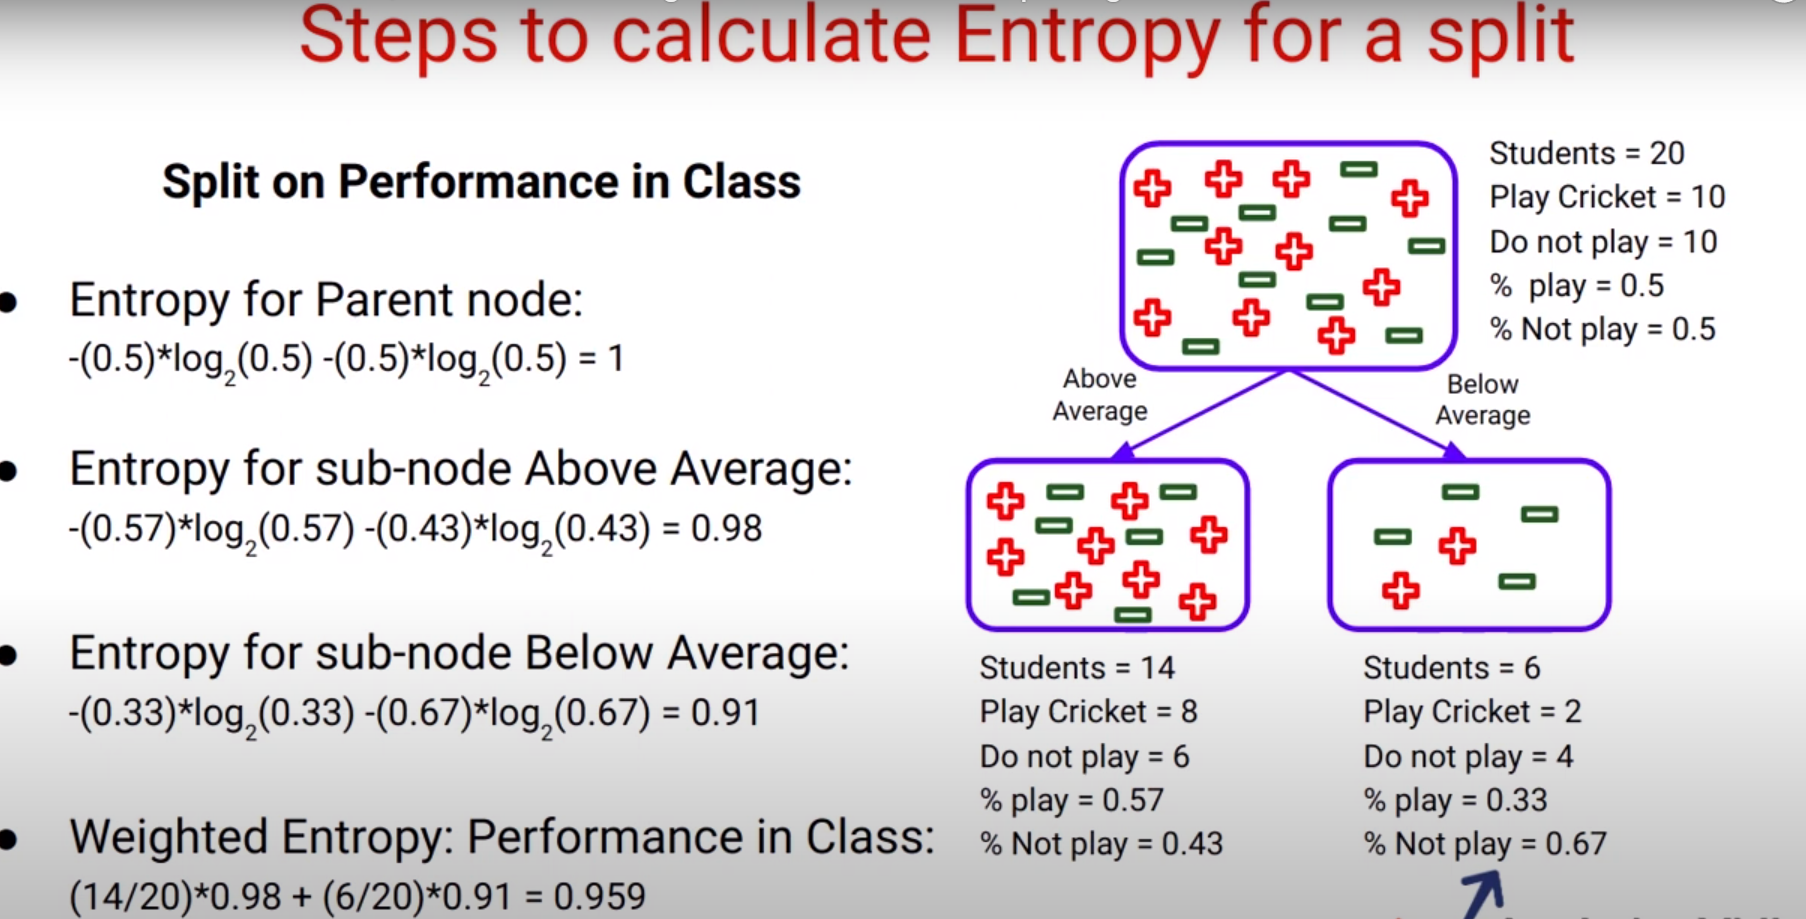

***Here are the procedures of determining the split in decision tree:***
1.   First, we would calculate the **entropy of the parent node.**
2.   Then, choose a split (**or you can understand as choosing a feature and split by its category or certain value**) that would divide the parent node into **several child nodes according to the feature.**
3.   Calculate the **entropy for each child node**.
4.   In order to compare with the parent and check whether the split actually have more information gain in each node, we need to calculate the **weighted entropy** = ***the sum of the proportion of each sample size in the entire parent sample size multiplys their corresponding entropies***.
5.   Then compare this weighted entropy to the parent entropy.
6.   Select the split that **improves the most in information gain**.









## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the Decision Tree Classification model on the Training set

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

## Predicting a new result

In [ ]:
print(classifier.predict(sc.transform([[30, 87000]])))

[0]


## Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test)

## Making the Confusion Matrix

0.91

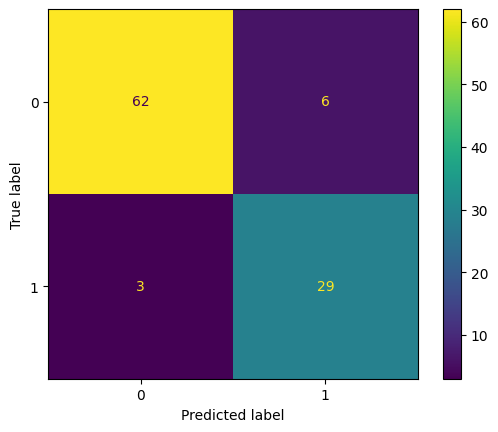

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1]).plot()
accuracy_score(y_test, y_pred)

## Visualising the Training set results

<ipython-input-20-225728e20334>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1], c=ListedColormap(('salmon', 'dodgerblue'))(i), label=j)


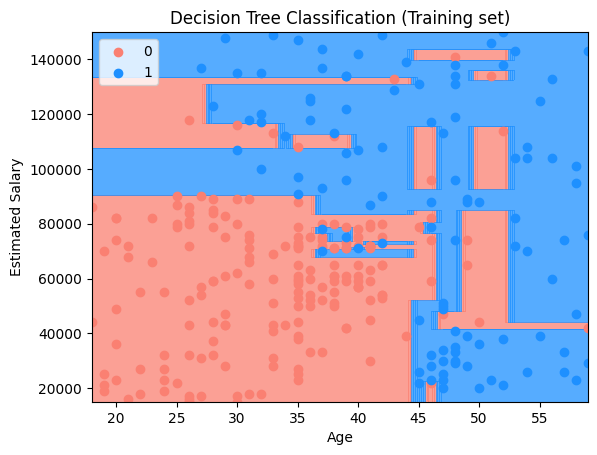

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min(), stop=X_set[:,0].max(), step=1),
                     np.arange(start=X_set[:,1].min(), stop=X_set[:,1].max(), step=1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('salmon', 'dodgerblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1], c=ListedColormap(('salmon', 'dodgerblue'))(i), label=j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising the Test set results

<ipython-input-21-d83ea38ae74e>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1], c=ListedColormap(('salmon', 'dodgerblue'))(i), label=j)


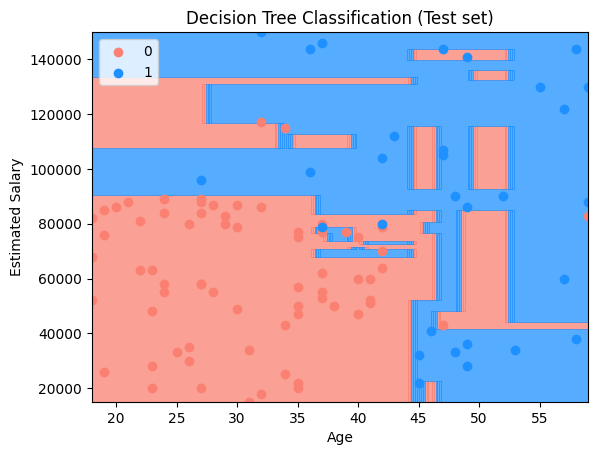

In [ ]:
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min(), stop=X_set[:,0].max(), step=1),
                     np.arange(start=X_set[:,1].min(), stop=X_set[:,1].max(), step=0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('salmon', 'dodgerblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1], c=ListedColormap(('salmon', 'dodgerblue'))(i), label=j)
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()